In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

df_data = pd.read_csv("C:/Users/a/Downloads/Tetuan City power consumption.csv")
df_data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [80]:
df = df_data.drop(["DateTime"], axis=1)
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [81]:
df.isnull().sum()

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [83]:
X = df.iloc[:,[0,1,2,3,4]].values
y = df.iloc[:,5].values

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41932, 5), (10484, 5), (41932,), (10484,))

In [86]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                384       
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [88]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1311/1311 [==============================] - 2s 2ms/step - loss: 1013202688.0000 - mse: 1013202688.0000 - val_loss: 799636416.0000 - val_mse: 799636416.0000
Epoch 2/100
1311/1311 [==============================] - 2s 2ms/step - loss: 404963360.0000 - mse: 404963360.0000 - val_loss: 140003856.0000 - val_mse: 140003856.0000
Epoch 3/100
1311/1311 [==============================] - 4s 3ms/step - loss: 94340104.0000 - mse: 94340104.0000 - val_loss: 62312016.0000 - val_mse: 62312016.0000
Epoch 4/100
1311/1311 [==============================] - 3s 2ms/step - loss: 50054828.0000 - mse: 50054828.0000 - val_loss: 43725960.0000 - val_mse: 43725960.0000
Epoch 5/100
1311/1311 [==============================] - 2s 2ms/step - loss: 41679264.0000 - mse: 41679264.0000 - val_loss: 40786472.0000 - val_mse: 40786472.0000
Epoch 6/100
1311/1311 [==============================] - 2s 2ms/step - loss: 40360952.0000 - mse: 40360952.0000 - val_loss: 40208336.0000 - val_mse: 40208336.0000
Epoch 7/100


In [89]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

328/328 [==============================] - 0s 795us/step - loss: 38885388.0000 - mse: 38885388.0000


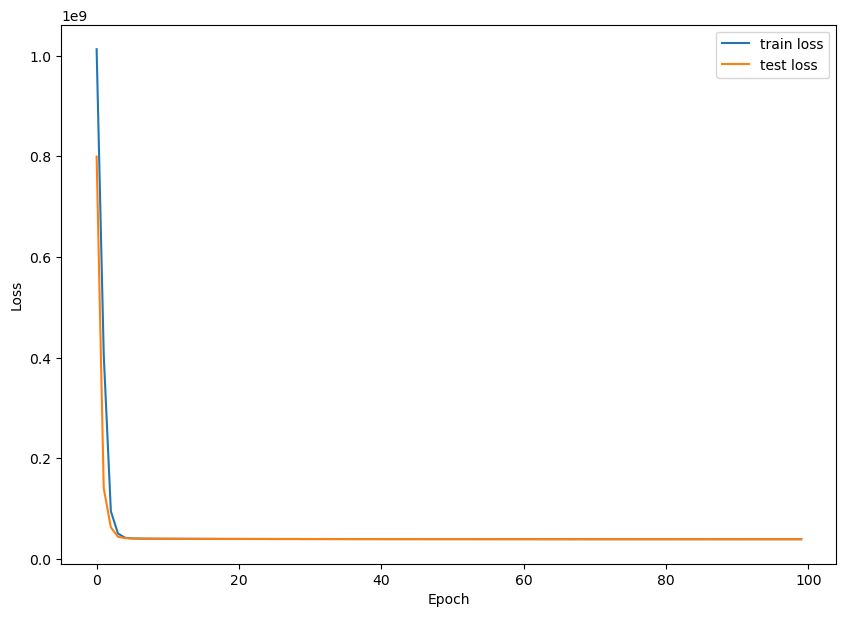

In [92]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()